In [1]:
%run Data_Preprocessing.ipynb

0.23.1


In [2]:
from sklearn import neighbors, linear_model

df_new=sample_data()
trX,teX,trY,teY=make_test_train(df_new)


In [3]:
#balance test
np.sum(df_new['stalt']==0)/df_new.shape[0]

0.5217650566487776

## Logistic Regression with stat model -- get p value

In [4]:
import statsmodels.api as sm

logit=sm.Logit(trY,trX)
model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.373896
         Iterations 8


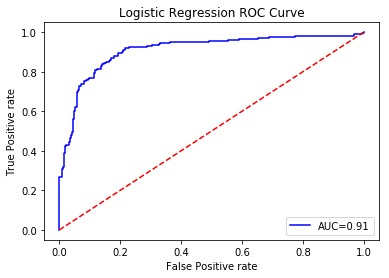

Accuracy score 0.845238
AUC score 0.908682
ks statistic 0.704432


In [5]:
auc_score,accuracy_score,ks=calc_metrics(model,teX,teY,0.5,0)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [6]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1173
Model:                          Logit   Df Residuals:                     1164
Method:                           MLE   Df Model:                            8
Date:                Fri, 19 Jun 2020   Pseudo R-squ.:                  0.4598
Time:                        16:18:34   Log-Likelihood:                -438.58
converged:                       True   LL-Null:                       -811.95
                                        LLR p-value:                6.142e-156
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
prcc_f               -0.7920      0.057    -14.005      0.000      -0.903      -0.681
at                    0.1466      0.036      4.027      0.000       0.075       0.218
epsfi                -0.

## Logistic Regression with sklearn

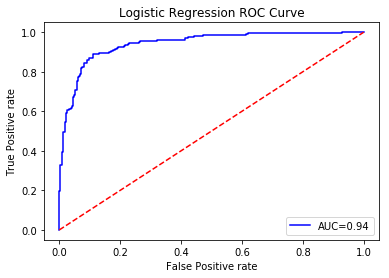

Accuracy score 0.880952
AUC score 0.941546
ks statistic 0.778048


In [7]:
logistic=linear_model.LogisticRegression(penalty='l2',tol=0.0001,C=1000,max_iter=1000,random_state=random_state).fit(trX,trY)
auc_score,accuracy_score,ks=calc_metrics(logistic,teX,teY,0.5,1)

print('Accuracy score %f' % accuracy_score)
print('AUC score %f' % auc_score)
print('ks statistic %f' % ks)

In [8]:
#sklearn accuracy
logistic.score(teX,teY)

0.8809523809523809

In [9]:
logistic.score(trX,trY)

0.8789428815004262

In [12]:
logistic.intercept_

array([-10.87473822])

In [13]:
logistic.coef_

array([[-1.04056023e+00,  4.41362817e-01, -9.45271862e-02,
         4.88774738e-03, -6.90590091e-02,  1.79395733e-01,
         2.83426824e+01,  1.64502214e+01,  8.79153185e+01]])